In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn import manifold, datasets

In [4]:
from simple_tsne import tsne, momentum_func

In [5]:
plt.style.use('seaborn-white')
rcParams['font.size'] = 18
rcParams['figure.figsize'] = (12, 8)

In [77]:
%%capture
digits, digit_class = datasets.load_digits(return_X_y=True)
blobs, blob_classes = datasets.make_blobs(n_samples=2000, n_features=2, 
                                          random_state=42,
                                          cluster_std=.10,
                                          centers=np.array([[0,0], 
                                                            [1,0], 
                                                            [1,1], 
                                                            [0,1]]))
rand_idx = np.random.choice(np.arange(digits.shape[0]), size=500, replace=False)

In [7]:
tsne_digits = tsne(digits, 2, 30, 500, 100, momentum_func, pbar=True, random_state = 42)

Iterations: 100%|████████████████████████████████████████████████████████████████████| 500/500 [03:15<00:00,  2.55it/s]


In [9]:
method_funcs = [PCA(n_components=2, random_state=42), 
           manifold.Isomap(n_neighbors=30, n_components=2, n_jobs=-1),
          manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, 
                                             method='standard', random_state=42, 
                                             n_jobs=-1)]
method_names = ["PCA", "Isomap", "LLE", "t-SNE"]
transformed_digits = [clf.fit_transform(digits) for clf in method_funcs]
transformed_digits.append(tsne_digits)

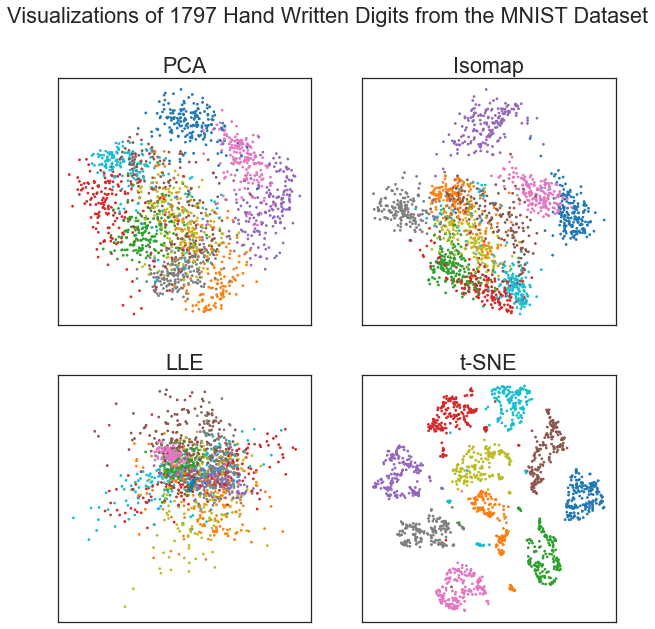

In [148]:
ax_args = {'xticklabels': [],
               'yticklabels': [],
               'xticks': [],
               'yticks': []}

fig, ax = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [ 1, 1]})
ax = ax.ravel()
for i, (name, points) in enumerate(zip(method_names, transformed_digits)):
    scatter = ax[i].scatter(points[:,0], points[:,1], s=3,
                            cmap='tab10', c=digit_class)
    ax[i].set(title=name, **ax_args)

    
fig.suptitle('Visualizations of 1797 Hand Written Digits from the MNIST Dataset')
plt.savefig('../plots/mnist_comparison.png')
plt.show()

In [113]:
method_1d_funcs = [PCA(n_components=1, random_state=42), 
           manifold.Isomap(n_neighbors=30, n_components=1, n_jobs=-1),
          manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=1, 
                                             method='standard', random_state=42, 
                                             n_jobs=-1)]

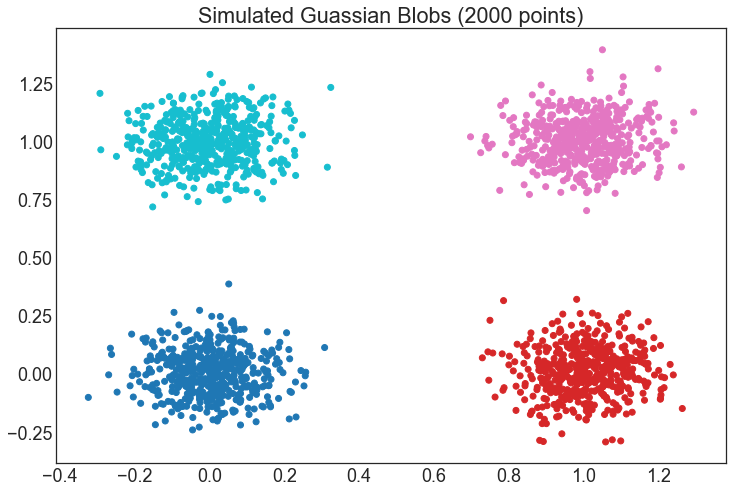

In [149]:
fig = plt.figure()

plt.scatter(blobs[:,0], blobs[:,1], c=blob_classes, cmap='tab10')
plt.title('Simulated Guassian Blobs (2000 points)')

fig.set_facecolor('#ffffff')
plt.savefig('../plots/blobs_data.png')

In [142]:
tsne_blob_1d = tsne(blobs, 1, 100, 500, 100, momentum_func, pbar=True, random_state = 42)

Iterations: 100%|████████████████████████████████████████████████████████████████████| 500/500 [02:48<00:00,  2.96it/s]


In [143]:
transformed_1d_blobs = [clf.fit_transform(blobs) for clf in method_1d_funcs]
transformed_1d_blobs.append(tsne_blob_1d)

(-20, 20)

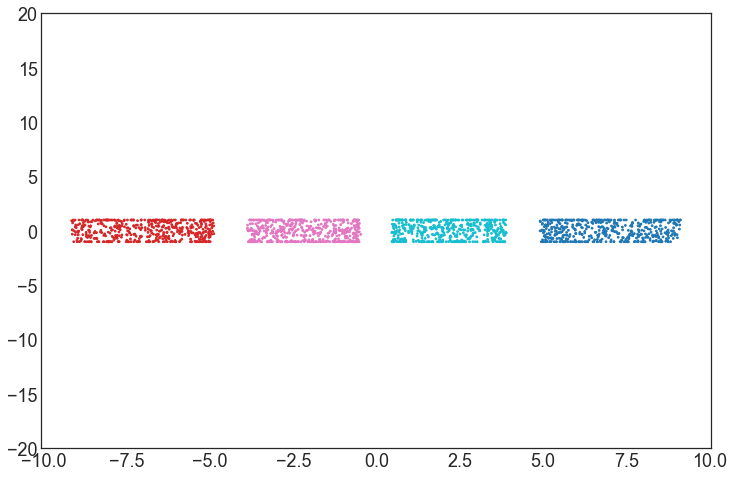

In [144]:
plt.scatter(tsne_blob_1d[:,0], np.random.randn(len(tsne_blob_1d)).clip(-1, 1), c=blob_classes, cmap='tab10', s=3)
plt.ylim(-20, 20)

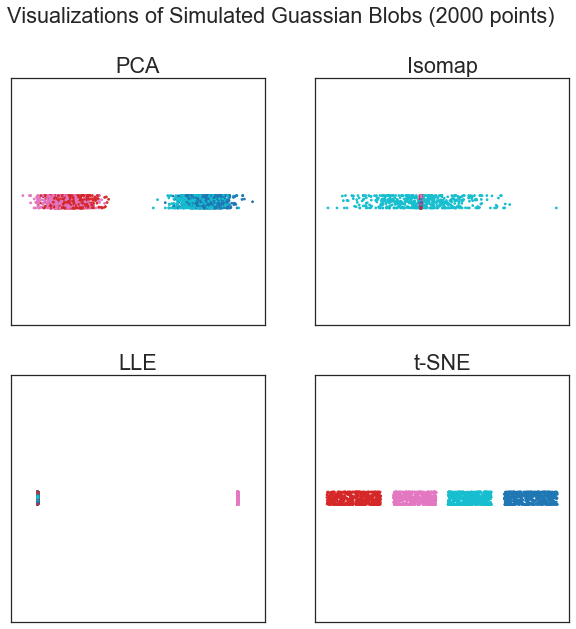

In [150]:
y_placeholder = np.random.randn(len(tmp)).clip(-1, 1)
fig, ax = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [ 1, 1]})
ax = ax.ravel()
for i, (name, points) in enumerate(zip(method_names, transformed_1d_blobs)):
    scatter = ax[i].scatter(points, y_placeholder, s=3, cmap='tab10', c=blob_classes)
    ax[i].set(title=name, **ax_args)
    ax[i].set_ylim(-20, 20)

    
fig.suptitle('Visualizations of Simulated Guassian Blobs (2000 points)')

plt.savefig('blobs_comparison.png')
plt.show()
